In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
cr  = pd.read_csv("../data/UCI_Credit_Card.csv")

In [2]:
cr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
cr["default.payment.next.month"]

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

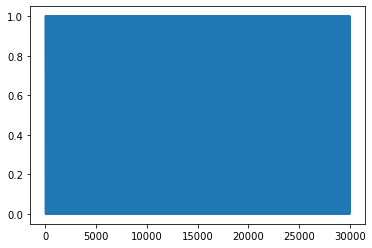

In [11]:
plt.plot(cr.ID, cr["default.payment.next.month"])

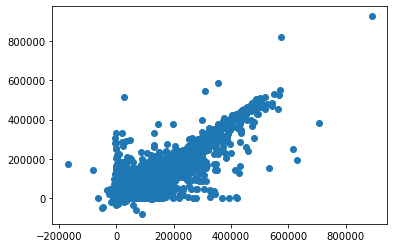

In [4]:
plt.plot(cr.BILL_AMT4, cr.BILL_AMT5,'o')

In [5]:
# Split this to plot by color..
d1 = cr.query("`default.payment.next.month` ==1")
d0 = cr.query("`default.payment.next.month` ==0")

In [7]:
# What is the fraction of customers that defaulted next month?
len(d1) /(len(d0)+len(d1))

0.2212

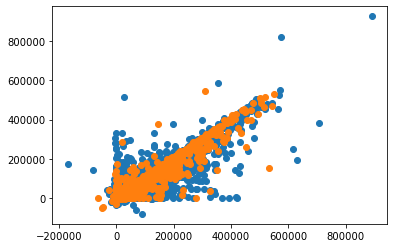

In [6]:
plt.plot(d0.BILL_AMT4, d0.BILL_AMT5,'o')
plt.plot(d1.BILL_AMT4, d1.BILL_AMT5,'o')

In [7]:
len(d1), len(d0)

(6636, 23364)

In [8]:
cr.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [13]:
# Split into test and train, 75% for training:
randindex = np.random.permutation(len(cr))
cutoff = int(len(randindex) * .75)
scrambled = cr.iloc[randindex,:]
test,train = cr.iloc[cutoff:,:], cr.iloc[:cutoff,:]
X = train.iloc[:,1:-1]  # Exclude Y and ID column from features
Y = train["default.payment.next.month"]
Xtest = test.iloc[:,1:-1]
Ytest = test["default.payment.next.month"]

In [14]:
X.shape, Y.shape, Xtest.shape, Ytest.shape

((22500, 23), (22500,), (7500, 23), (7500,))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Completely naive, no scaling.. credit limit will dominate...
knn = KNeighborsClassifier(n_neighbors=5).fit(X,Y)

In [16]:
Ypred = knn.predict(Xtest)

In [17]:
np.sum(np.equal(Ypred, Ytest)) / len(Ypred)

0.77

In [18]:
ks = range(1,301,5)
acc = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X,Y)
    accuracy = np.sum(np.equal(knn.predict(Xtest), Ytest)) / len(Ypred)
    acc.append(accuracy)
    print(k, accuracy)

1 0.7078666666666666
6 0.7865333333333333
11 0.784
16 0.7906666666666666
21 0.7913333333333333
26 0.7941333333333334
31 0.7936
36 0.7936
41 0.7936
46 0.7928
51 0.7914666666666667
56 0.7921333333333334
61 0.7928
66 0.7938666666666667
71 0.7922666666666667
76 0.7922666666666667
81 0.7909333333333334
86 0.7925333333333333
91 0.7925333333333333
96 0.7934666666666667
101 0.7930666666666667
106 0.7928
111 0.7936
116 0.7933333333333333
121 0.7934666666666667
126 0.7936
131 0.7933333333333333
136 0.7932
141 0.7928
146 0.7925333333333333
151 0.7925333333333333
156 0.7934666666666667
161 0.7928
166 0.7932
171 0.7934666666666667
176 0.7933333333333333
181 0.7941333333333334
186 0.7944
191 0.7944
196 0.7938666666666667
201 0.7941333333333334
206 0.794
211 0.7941333333333334
216 0.7942666666666667
221 0.7945333333333333
226 0.7941333333333334
231 0.7936
236 0.7929333333333334
241 0.7932
246 0.7932
251 0.7932
256 0.7937333333333333
261 0.7934666666666667
266 0.7936
271 0.7937333333333333
276 0.79373

(0.2, 0.22)

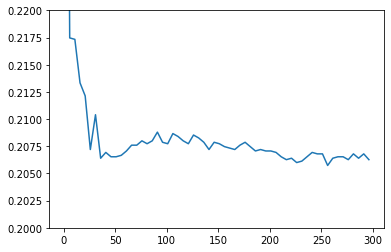

In [28]:
plt.plot(ks, 1-np.array(acc))
plt.ylim([0.20, 0.22])
plt.title("knn with foolish Euclidean distance")

In [ ]:
# This is less than reassuring.  The lack of dependence on the
# number of neighbors makes me think I'm not really doing anything (good)
cr["default.payment.next.month"].value_counts()

In [ ]:
defaultrate = 6636 / (23364 + 6636)
defaultrate

In [ ]:
#  If I just assume no one will default I have an error rate of 22%.
# Confusion matrix?
confusion = knn.predict(Xtest) * 10 + Ytest 

In [ ]:
# Right, I forgot the Mahlabanobis distances.  Let's try those.


In [ ]:
#V2 = np.cov(X)
#V2.shape   # 22500 x 22500 that's not it!

In [13]:
# Claculate correlation matrix for mahlanobis distance:
V = np.cov(X.T)
V.shape  

(24, 24)

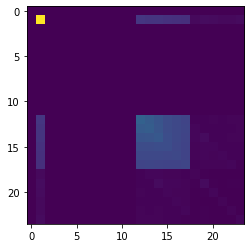

In [15]:
plt.imshow(V)

<ipython-input-16-0bd5dd372d6d>:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(V.ravel())/np.log(10), bins=100)


(array([ 2.,  0.,  2.,  2.,  4.,  4.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,
         1.,  1.,  0.,  0.,  9., 14., 14.,  2.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  2.,  4.,  2.,  0.,  0.,  3.,  6.,  4.,  2.,  4.,
         4.,  0.,  2.,  4.,  0.,  0.,  0.,  4.,  4.,  4.,  0.,  2., 10.,
        58.,  2.,  6.,  6.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  8.,  0.,  2.,  0.,  2.,  0.,  0.,
        10., 11., 10.,  0.,  2., 18., 26., 22.,  7., 13.,  2.,  0.,  0.,
         0.,  0., 12., 27.,  9.,  0.,  0.,  0.,  1.]),
 array([-2.38608096e+00, -2.26004106e+00, -2.13400115e+00, -2.00796125e+00,
        -1.88192135e+00, -1.75588144e+00, -1.62984154e+00, -1.50380164e+00,
        -1.37776174e+00, -1.25172183e+00, -1.12568193e+00, -9.99642029e-01,
        -8.73602127e-01, -7.47562224e-01, -6.21522321e-01, -4.95482419e-01,
        -3.69442516e-01, -2.43402614e-01, -1.17362711e-01,  8.67719171e-03,
         1.34717094e-01,  2.60756997e-01,  3.86796900e

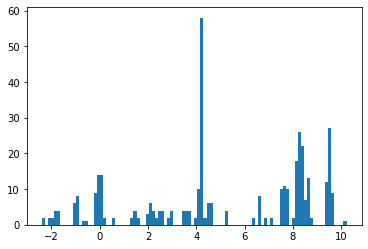

In [16]:
plt.hist(np.log(V.ravel())/np.log(10), bins=100)


In [ ]:
# The coefficients in the covariance matrix span 10^{-2} to 10^{10}.. that's a factor of a million in
# standard deviaion. 
# That's ok,  Credit limits of $NT 200k are being compared to indicator variables..

In [ ]:
ks = range(5,15,5)
assert False  # this cell takes too long 
acc_mahalanobis = []
for k in ks:
    knn = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=k, 
            metric_params={'V': V} ).fit(X, Y)
    accuracy = np.sum(np.equal(knn.predict(Xtest), Ytest)) / len(Ypred)
    acc_mahalanobis.append(accuracy)
    print(k, accuracy)
# Well this takes forever, and I want to make sure the only thing I changed was the distance

In [ ]:
# Why doesn't this cell complete? 

In [14]:
%%time
knn = KNeighborsClassifier(n_neighbors=5).fit(X,Y)
Ypred = knn.predict(Xtest)

CPU times: user 1.26 s, sys: 14.2 ms, total: 1.28 s
Wall time: 1.41 s


In [17]:
# That was quick... multiplying by 25x25 shouldn't slow it down so much..

In [18]:
%%time
k=5
knnm = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=k, 
            metric_params={'V': V} ).fit(X, Y)
# Fitting the model is quick... 

CPU times: user 164 ms, sys: 6.72 ms, total: 171 ms
Wall time: 209 ms


In [19]:
%%time 
print(Xtest.shape)
Ypredm = knnm.predict(Xtest[0:20])

(7500, 24)
CPU times: user 368 ms, sys: 5.35 ms, total: 373 ms
Wall time: 432 ms


In [22]:
%%time 
print(200)
Ypredm = knnm.predict(Xtest[0:200])

200
CPU times: user 2.92 s, sys: 21.9 ms, total: 2.94 s
Wall time: 3.16 s


In [21]:
%%time 
print(2000)
Ypredm = knnm.predict(Xtest[0:2000])

(7500, 24)
CPU times: user 28.4 s, sys: 133 ms, total: 28.5 s
Wall time: 30 s


In [ ]:
# 30 seconds to test 2000..  should be about four minutes to test 7500.

In [23]:
%%time 
print(Xtest.shape)
Ypredm = knnm.predict(Xtest)

(7500, 24)
CPU times: user 2min 2s, sys: 837 ms, total: 2min 3s
Wall time: 2min 15s


In [25]:
%%time 
ks = range(5,200,30) # only look at 6 values of k at first
# The for loop was the right thing, it just takes 5 minutes per iteration.
acc_mahalanobis = []
for k in ks:
    knn = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=k, 
            metric_params={'V': V} ).fit(X, Y)
    accuracy = np.sum(np.equal(knn.predict(Xtest), Ytest)) / len(Ypred)
    acc_mahalanobis.append(accuracy)
    print(k, accuracy)
# 

5 0.8093333333333333
35 0.8242666666666667
65 0.82
95 0.8137333333333333
125 0.8105333333333333
155 0.8085333333333333
185 0.806
CPU times: user 13min 45s, sys: 3.97 s, total: 13min 49s
Wall time: 14min 41s


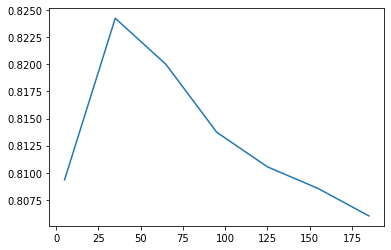

In [26]:
plt.plot(ks, acc_mahalanobis)

In [30]:
%%time 
ks2 = [5,15,25,50,100,200,400,800,1600] # 
# The for loop was the right thing, it just takes 5 minutes per iteration.
acc_mahalanobis = []
for k in ks2:
    knn = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=k, 
            metric_params={'V': V} ).fit(X, Y)
    accuracy = np.sum(np.equal(knn.predict(Xtest), Ytest)) / len(Ypred)
    acc_mahalanobis.append(accuracy)
    print(k, accuracy)

5 0.8093333333333333
15 0.8210666666666666
25 0.8250666666666666
50 0.8212
100 0.8133333333333334
200 0.8052
400 0.8004
800 0.7969333333333334
1600 0.794
CPU times: user 17min 52s, sys: 5.67 s, total: 17min 57s
Wall time: 19min 7s


(0.2, 0.22)

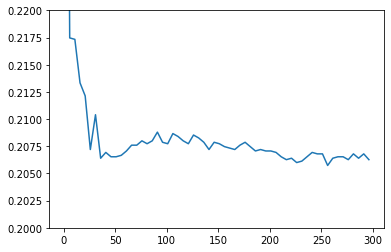

In [29]:
plt.plot(ks, 1-np.array(acc))
plt.ylim([0.20, 0.22])

(0.17, 0.22)

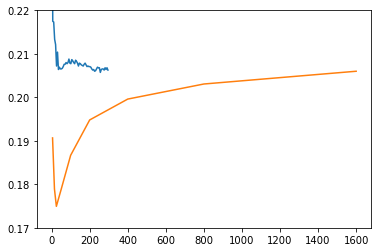

In [33]:
plt.plot(ks, 1-np.array(acc))
plt.plot(ks2, 1-np.array(acc_mahalanobis
                        ))
plt.ylim([0.17, 0.22])

In [ ]:
# Clearly we need some more points near the peak.  
# Yeh & Lien report 16% error for KNN.

In [34]:
# Go back and get some more values..
for k in [11,21,31,13,17,19,23]:
    knn = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=k, 
            metric_params={'V': V} ).fit(X, Y)
    accuracy = np.sum(np.equal(knn.predict(Xtest), Ytest)) / len(Ypred)
    acc_mahalanobis.append(accuracy)
    ks2.append(k)
    print(k, accuracy)

11 0.8194666666666667
21 0.8244
31 0.824
13 0.8212
17 0.8214666666666667
19 0.8233333333333334
23 0.8244


Text(0, 0.5, 'Accuracy')

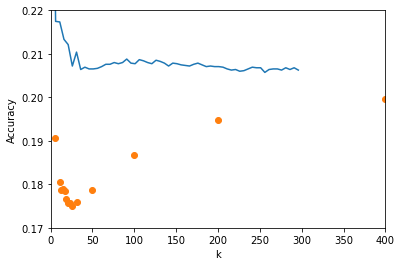

In [36]:
plt.plot(ks, 1-np.array(acc))
plt.plot(ks2, 1-np.array(acc_mahalanobis
                        ), 'o')
plt.ylim([0.17, 0.22])
plt.xlim([0, 400])
plt.xlabel("k")
plt.ylabel("Error rate")

In [7]:
# Idle curiosity, what if we scaled X but not with the off-diagonal terms?
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
Xtest_scaled = scaler.transform(Xtest)


In [9]:
%%time 
ks3 = np.arange(5,75,2) # This one runs much faster, 15 seconds per iteration
acc_mahalanobis3 = []
for k in ks3:
    knn = KNeighborsClassifier( n_neighbors=k ).fit(X_scaled, Y)
    accuracy = np.sum(np.equal(knn.predict(Xtest_scaled), Ytest)) / len(Ytest)
    acc_mahalanobis3.append(accuracy)
    print(k, accuracy)

5 0.8141333333333334
7 0.8201333333333334
9 0.8225333333333333
11 0.8228
13 0.8230666666666666
15 0.824
17 0.8257333333333333
19 0.8266666666666667
21 0.8274666666666667
23 0.8272
25 0.8264
27 0.8268
29 0.8269333333333333
31 0.8257333333333333
33 0.826
35 0.8256
37 0.8249333333333333
39 0.8242666666666667
41 0.8245333333333333
43 0.8248
45 0.824
47 0.8234666666666667
49 0.8241333333333334
51 0.8241333333333334
53 0.8238666666666666
55 0.8246666666666667
57 0.8233333333333334
59 0.8234666666666667
61 0.8226666666666667
63 0.8222666666666667
65 0.8224
67 0.8226666666666667
69 0.8224
71 0.8226666666666667
73 0.8225333333333333
CPU times: user 7min 29s, sys: 4.18 s, total: 7min 33s
Wall time: 8min 38s


15.294117647058824

Text(0, 0.5, 'Accuracy')

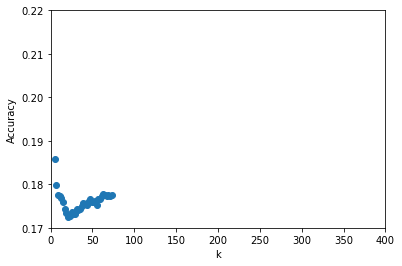

In [12]:
#plt.plot(ks, 1-np.array(acc))
#plt.plot(ks2, 1-np.array(acc_mahalanobis  ), 'o')
plt.plot(ks3, 1-np.array(acc_mahalanobis3), 'o')
plt.ylim([0.17, 0.22])
plt.xlim([0, 400])
plt.xlabel("k")
plt.ylabel("Accuracy")